<a href="https://colab.research.google.com/github/dhwlxor/My-Ropo/blob/main/Cleaned_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving x.png to x (2).png
✅ 모델 로드 완료


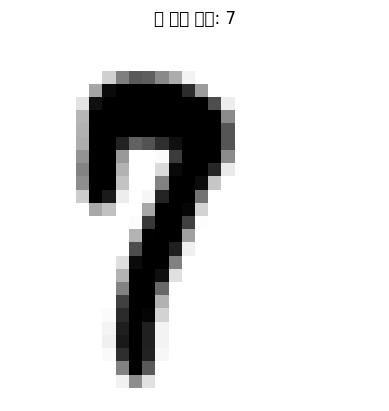

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ipycanvas import Canvas
from ipywidgets import Button, VBox, Output
from IPython.display import display
from PIL import Image
from google.colab import files

# 1) 모델 업로드 및 로드
uploaded = files.upload()  # mnist_cnn_model.h5 선택
model = tf.keras.models.load_model('mnist_cnn_model.h5')
print("✅ 모델 로드 완료")

# 2) 캔버스, 버튼, 출력 영역 생성
canvas = Canvas(width=280, height=280, sync_image_data=True)
predict_btn = Button(description="🧠 Predict")
clear_btn = Button(description="🧹 Clear")
output = Output()

# 3) 숫자 인식 함수
def recognize_digit():
    data = canvas.get_image_data(0, 0, 280, 280)
    img = np.array(data.data)[::4].reshape((280, 280))  # R 채널만 사용
    img = 1 - (img / 255.0)                             # 색 반전 및 정규화
    img = tf.image.resize(img[..., np.newaxis], (28, 28))  # 28x28 크기 변환
    img = img.numpy().reshape(1, 28, 28, 1)             # 배치 차원 추가

    pred = model.predict(img, verbose=0)
    pred_label = np.argmax(pred)

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"📢 예측 숫자: {pred_label}")
    plt.axis('off')
    plt.show()

# 4) 버튼 클릭 이벤트 핸들러
def on_predict_clicked(b):
    output.clear_output()
    with output:
        recognize_digit()

def on_clear_clicked(b):
    canvas.clear()

predict_btn.on_click(on_predict_clicked)
clear_btn.on_click(on_clear_clicked)

# 5) UI 출력
display(VBox([canvas, VBox([predict_btn, clear_btn]), output]))

# 6) x.png 이미지 예측
img = Image.open('x.png').convert('L')  # 흑백 변환
img = img.resize((28, 28))              # MNIST 크기 맞춤
img_array = np.array(img)

img_array = 255 - img_array             # 색 반전
img_array = img_array / 255.0           # 정규화
img_array = img_array.reshape(1, 28, 28, 1)  # CNN 입력형태

pred = model.predict(img_array, verbose=0)
pred_label = np.argmax(pred)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f'📢 예측 숫자: {pred_label}')
plt.show()

